In [10]:
import librosa
import numpy as np
from matplotlib import pyplot as plt

In [11]:
file = '108-42.aiff'
# 1-8 are in a cirlce (unidirectional)
# 9-16 are in a circle (unidirectional)

samples, sr = librosa.load(file, mono=False)
# Compute short-time Fourier Transform (stft)

# STFT

In [12]:
from scipy import signal

In [13]:
# VARIABLES
nperseg = 4500

channel = 15
t_i = 0
t_f = None
if t_f == None:
    t_f = sr * channel

    
# Setup
fs = sr
target_range = slice(t_i * fs ,t_f * fs)
x = samples[channel - 1][target_range]

# Run STFT
f, t, Zxx = signal.stft(x, fs, nperseg=nperseg)

print(np.abs(Zxx).min(), np.abs(Zxx).max(), np.abs(Zxx).mean())
print(np.diff(t)[0])

1.629619e-14 0.01764044 4.112206e-05
0.10204081632653061


### Visualization

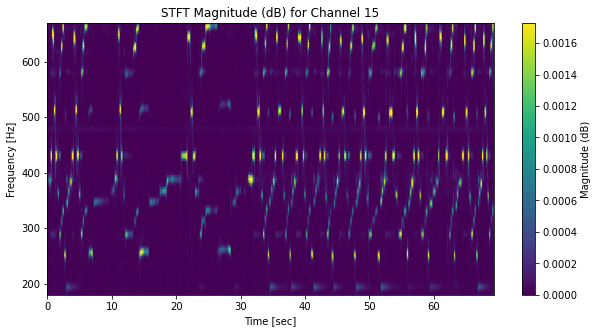

In [14]:
# VARIABLES
vmin = 0
vmax = np.abs(Zxx.max()) / 10
freq_min = 180 # in Hz, (196Hz is G3)
freq_max = 670 # in Hz, (659.3Hz is E5)

# Plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=vmin, vmax=vmax, shading='gouraud')
plt.ylim([freq_min,freq_max])
plt.title(f'STFT Magnitude (dB) for Channel {channel}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar().set_label('Magnitude (dB)')

# Pick Max Values

In [15]:
# Me finding the proper indicies
print(f[35*9]) # f min equiv
print(f[137*9]) # f max equiv

1543.4999999999998
6041.699999999999


In [16]:
freq_min = 34  # index, 180 Hz equivalent
freq_max = 137 # index, 670 Hz equivalent

# Cut out STFT data which is outside of our play range
Zxx_abs = np.abs(Zxx)[:freq_max].T

# 
freq_indicie = [np.argmax(Zxx_abs_ti) for Zxx_abs_ti in Zxx_abs]
freqs = [f[i] for i in freq_indicie]

Text(0.5, 0, 'Time (sec)')

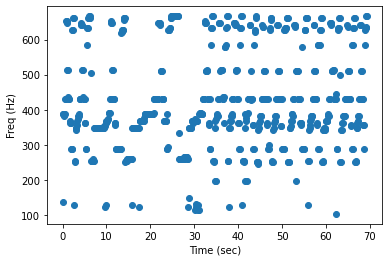

In [17]:
plt.scatter(t, freqs)
plt.ylabel('Freq (Hz)')
plt.xlabel('Time (sec)')

# Musical Phrase
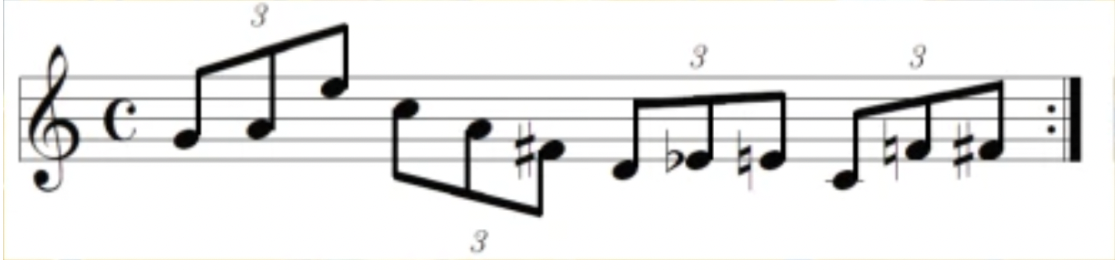

Text(0, 0.5, 'Freq (Hz)')

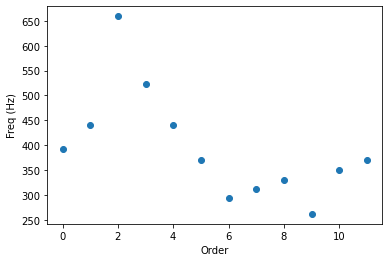

In [18]:
phrase = np.array(["G4", "A4", "E5", 
          'C5', 'A4', 'F♯4',
          'D4', 'Eb4', 'E4',
          'C4',  'F4',  'F♯4'])
phrase_hz = librosa.note_to_hz(phrase)

notes_dict = dict(zip(phrase, phrase_hz))

plt.scatter(range(len(phrase_hz)), phrase_hz)
plt.xlabel('Order')
plt.ylabel('Freq (Hz)')

# Determining Letter Note Played

## Method #1: `librosa.hz_to_note`

In [19]:
# Convert STFT 
notes = np.array([librosa.hz_to_note(freq, cents=False) for freq in freqs])
notes = np.where(np.isin(notes, phrase), notes, np.nan)

In [20]:
import matplotlib.colors as mcolors

def create_shading_between_colors(color1, color2, num_steps):
    '''
    Creates color map for matplotlib.pyplot
    '''
    cmap_colors = [color1, color2]
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors, num_steps)
    return cmap

In [21]:
def select_color(i, note, notes):
    '''
    Since we have repeated notes, this piece of a code looks
    at the previous played note to match to the order in 
    the musical phrase.
    
    Args
    * i (int) 
    '''
    
    phrase = np.array(["G4", "A4", "E5", 
          'C5', 'A4', 'F♯4',
          'D4', 'Eb4', 'E4',
          'C4',  'F4',  'F♯4'])
    
    cmap = create_shading_between_colors('black', 'white', len(phrase))    
    
    if (note == 'A4'):
        if (notes[i - 1] == 'G4'):
            return cmap(1)
        elif (notes[i - 1] == 'C5'):
            return cmap(4)
        else:
            return None # Makes color = white
    if (note == 'F♯4'):
        if (notes[i - 1] == 'A4'):
            return cmap(5)
        elif (notes[i - 1] == 'F4'):
            return cmap(11)
        else:
            return None # Makes color = white
    else:
        indices = np.where(phrase == note)[0]
        color = cmap(indices)
        return color

# Plotting all Channels

In [22]:
from tqdm import tqdm

680it [00:00, 1329.13it/s]
680it [00:00, 1229.07it/s]
680it [00:00, 1372.06it/s]
680it [00:00, 1211.98it/s]
680it [00:00, 1351.50it/s]
680it [00:00, 1472.81it/s]
680it [00:00, 1428.85it/s]
680it [00:00, 1449.35it/s]
680it [00:00, 1603.35it/s]
680it [00:00, 1593.98it/s]
680it [00:00, 1789.52it/s]
680it [00:00, 1543.61it/s]
680it [00:00, 1318.20it/s]
680it [00:00, 1524.35it/s]
680it [00:00, 1536.16it/s]
680it [00:00, 1786.96it/s]


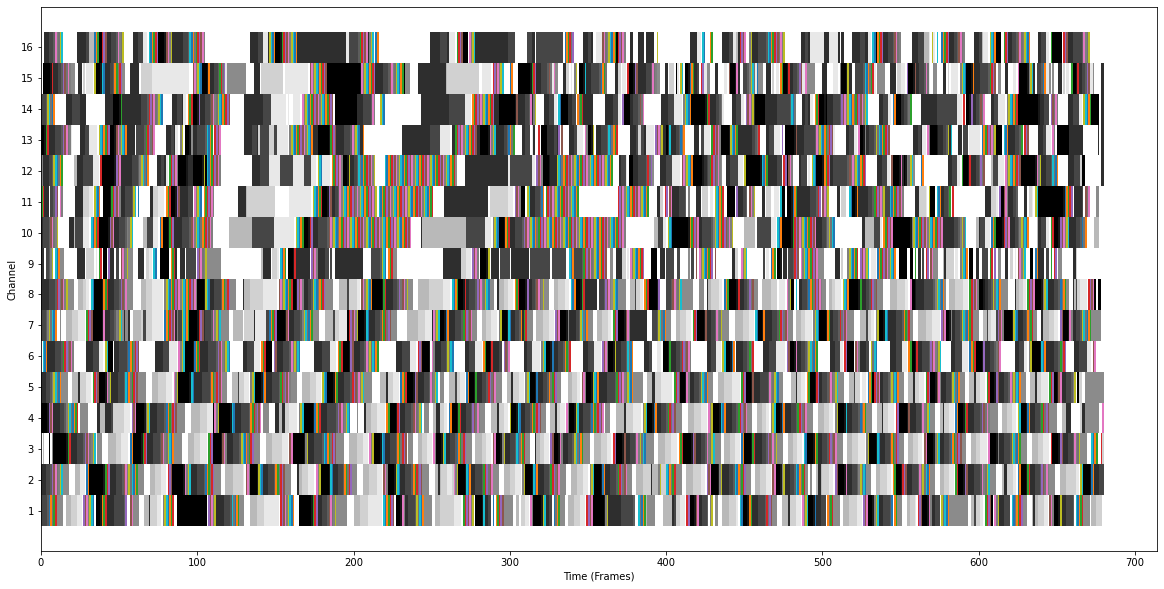

In [23]:

# VARIABLES
freq_min = 34  # 180 Hz equivalent
freq_max = 137 # 670 Hz equivalent

nperseg = 4500

phrase = np.array(["G4", "A4", "E5", 
          'C5', 'A4', 'F♯4',
          'D4', 'Eb4', 'E4',
          'C4',  'F4',  'F♯4'])

# Inital Plot
plt.figure(figsize=(20,10))

# Running through all channels
for channel, sample in enumerate(samples):
    channel += 1 # For naming convention
    
    # Short Term Fourier Transform
    x = samples[channel - 1]
    f, t, Zxx = signal.stft(x, sr, nperseg=nperseg)
    
    # Get fundamental Frequencies
    Zxx_abs = np.abs(Zxx)[:freq_max].T
    freq_indicie = [np.argmax(Zxx_abs_ti) for Zxx_abs_ti in Zxx_abs]
    freqs = f[freq_indicie]
    
    # Get note form, 
    notes = []
    for freq in freqs:
        if freq != 0:
            hz = librosa.hz_to_note(freq, cents=False)
            notes.append(hz)
        else:
            notes.append(np.nan)
    notes = np.where(np.isin(notes, phrase), notes, np.nan)
    
    for i, note in tqdm(enumerate(notes)):
        if note != 'nan':
            plt.barh(y=f'{channel}', 
                     width=1,
                     height=1,
                     left = i,
                     color=select_color(i, note, notes))
            
plt.xlabel('Time (Frames)')
plt.ylabel('Channel')
plt.savefig('Max Values from STFT.png', dpi=600)


# How to tell who's listening to who?

Example:
Consider you're looking at player 3. Their NN are 2 and 4.
We take Player number 3, and do correlation between the last half a second of 4 and 2.

Methodology:
1. We need to know the delay between them.
    - Note the delay changes over the experimental by $d(t) = 1/30 t$ (every 30 seconds, increase delay by 1 sec)
2. Determine coupling metrics $g$. Maximum number violins that they listen to.



